In [1]:
import numpy as np
import pandas as pd
import random, copy
import os

In [2]:
from sklearn.utils import shuffle
import keras
import tensorflow as tf
from sklearn import preprocessing

In [3]:
df = pd.read_csv("../input/induction-motor-multi-csv-files/combined_data_new.csv")
df["Label"].unique()

array([ 9.,  1.,  5.,  2.,  3.,  4.,  0., 10.,  6.])

In [4]:
df.iloc[0]

X_Value            0.000000
Acceleration      -5.351819
Acceleration_0     0.740582
Acceleration_1     8.295304
Voltage           -0.073965
Voltage_0         -0.435938
Voltage_1          0.510923
Voltage_2          0.000558
Voltage_3          0.187400
Label              9.000000
Speed             35.000000
Name: 0, dtype: float64

In [5]:
rows = len(df)
cols = len(df.iloc[0])
col_names = ['X_Value', 'Acceleration', 'Acceleration_0', 'Acceleration_1', 'Voltage', 'Voltage_0', 'Voltage_1',
             'Voltage_2', 'Voltage_3', 'Label', 'Speed']
df

,X_Value,Acceleration,Acceleration_0,Acceleration_1,Voltage,Voltage_0,Voltage_1,Voltage_2,Voltage_3,Label,Speed
0,0.00000,-5.351819,0.740582,8.295304,-0.073965,-0.435938,0.510923,0.000558,0.187400,9.0,35.0
1,0.00005,-4.234766,1.739646,9.915628,-0.078768,-0.442555,0.518180,0.000568,-0.171936,9.0,35.0
2,0.00010,-4.241035,-0.400662,4.644429,-0.077888,-0.434361,0.513546,0.000554,-0.182503,9.0,35.0
3,0.00015,-2.607558,-0.598338,1.464432,-0.084278,-0.440163,0.521092,0.000592,-0.020186,9.0,35.0
4,0.00020,-3.243099,-1.413354,-1.211480,-0.082729,-0.432257,0.516258,0.000537,-0.022895,9.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...
3719295,29.90475,-0.172585,-1.122119,-2.568856,0.129924,-0.215732,0.082520,-0.000397,-0.193148,5.0,25.0
3719296,29.90480,0.501556,-1.841121,-3.171822,0.130463,-0.218068,0.089042,-0.000500,-0.027359,5.0,25.0
3719297,29.90485,1.899502,-0.382981,-1.162346,0.129154,-0.216884,0.086343,-0.000420,-0.030208,5.0,25.0
3719298,29.90490,0.161535,-1.047591,-0.886533,0.128612,-0.217536,0.091821,-0.000439,-0.009865,5.0,25.0


In [6]:
data_mat = []

In [7]:
k=0
L = rows/100
for i in range(int(L)):
    k=i*100
    data_mat.append(df.iloc[k:k+100])

In [8]:
print(len(data_mat))
data_mat[0]

37193


,X_Value,Acceleration,Acceleration_0,Acceleration_1,Voltage,Voltage_0,Voltage_1,Voltage_2,Voltage_3,Label,Speed
0,0.00000,-5.351819,0.740582,8.295304,-0.073965,-0.435938,0.510923,0.000558,0.187400,9.0,35.0
1,0.00005,-4.234766,1.739646,9.915628,-0.078768,-0.442555,0.518180,0.000568,-0.171936,9.0,35.0
2,0.00010,-4.241035,-0.400662,4.644429,-0.077888,-0.434361,0.513546,0.000554,-0.182503,9.0,35.0
3,0.00015,-2.607558,-0.598338,1.464432,-0.084278,-0.440163,0.521092,0.000592,-0.020186,9.0,35.0
4,0.00020,-3.243099,-1.413354,-1.211480,-0.082729,-0.432257,0.516258,0.000537,-0.022895,9.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...
95,0.00475,0.436281,-0.069400,3.124211,-0.236546,-0.150201,0.385401,0.000526,-0.017473,9.0,35.0
96,0.00480,0.198291,0.118823,4.801021,-0.240716,-0.145455,0.384172,0.000523,-0.062727,9.0,35.0
97,0.00485,0.444640,1.853832,7.944993,-0.235219,-0.143930,0.378396,0.000500,-0.000724,9.0,35.0
98,0.00490,0.039345,2.547296,8.979384,-0.239397,-0.139089,0.375958,0.000509,0.082752,9.0,35.0


In [9]:
random.shuffle(data_mat)
data_mat[0]

,X_Value,Acceleration,Acceleration_0,Acceleration_1,Voltage,Voltage_0,Voltage_1,Voltage_2,Voltage_3,Label,Speed
527300,23.65000,1.229663,3.410319,1.591127,-0.065556,0.218967,-0.154621,0.000671,-0.111209,6.0,35.0
527301,23.65005,1.675403,4.874599,0.869431,-0.063080,0.216533,-0.156361,0.000651,-0.219664,6.0,35.0
527302,23.65010,1.509326,5.053244,1.155046,-0.060773,0.219026,-0.159176,0.000594,-0.015798,6.0,35.0
527303,23.65015,1.625740,4.456776,2.029168,-0.058248,0.215902,-0.160854,0.000641,-0.283504,6.0,35.0
527304,23.65020,0.792528,2.932335,1.580712,-0.055720,0.218723,-0.163708,0.000576,-0.168289,6.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...
527395,23.65475,1.315467,7.127127,5.059434,0.170671,0.060016,-0.231309,0.000665,-0.002886,6.0,35.0
527396,23.65480,0.441444,2.595426,1.330875,0.168658,0.059383,-0.229970,0.000616,0.472502,6.0,35.0
527397,23.65485,-1.295171,-2.652332,-1.728797,0.172850,0.055582,-0.230160,0.000574,-0.308093,6.0,35.0
527398,23.65490,-0.437373,-3.378945,-1.192121,0.171806,0.054826,-0.228166,0.000633,0.128132,6.0,35.0


In [10]:
Label_col=[]
for i in range(len(data_mat)):
    Label_col.append(data_mat[i].iloc[0]['Label'])

for i in range(len(Label_col)):
    if(Label_col[i]>6):
        Label_col[i]=Label_col[i]-2
    
print(np.unique(Label_col))
print(len(Label_col),len(data_mat))

[0. 1. 2. 3. 4. 5. 6. 7. 8.]
37193 37193


In [11]:
i = random.randint(0,len(data_mat)-1)
print(Label_col[i],data_mat[i].iloc[93]['Label'])

2.0 2.0


In [12]:
data_mat_copy = copy.deepcopy(data_mat)
data_mat_copy[0]

,X_Value,Acceleration,Acceleration_0,Acceleration_1,Voltage,Voltage_0,Voltage_1,Voltage_2,Voltage_3,Label,Speed
527300,23.65000,1.229663,3.410319,1.591127,-0.065556,0.218967,-0.154621,0.000671,-0.111209,6.0,35.0
527301,23.65005,1.675403,4.874599,0.869431,-0.063080,0.216533,-0.156361,0.000651,-0.219664,6.0,35.0
527302,23.65010,1.509326,5.053244,1.155046,-0.060773,0.219026,-0.159176,0.000594,-0.015798,6.0,35.0
527303,23.65015,1.625740,4.456776,2.029168,-0.058248,0.215902,-0.160854,0.000641,-0.283504,6.0,35.0
527304,23.65020,0.792528,2.932335,1.580712,-0.055720,0.218723,-0.163708,0.000576,-0.168289,6.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...
527395,23.65475,1.315467,7.127127,5.059434,0.170671,0.060016,-0.231309,0.000665,-0.002886,6.0,35.0
527396,23.65480,0.441444,2.595426,1.330875,0.168658,0.059383,-0.229970,0.000616,0.472502,6.0,35.0
527397,23.65485,-1.295171,-2.652332,-1.728797,0.172850,0.055582,-0.230160,0.000574,-0.308093,6.0,35.0
527398,23.65490,-0.437373,-3.378945,-1.192121,0.171806,0.054826,-0.228166,0.000633,0.128132,6.0,35.0


In [13]:
for i in range(len(data_mat_copy)):
    data_mat_copy[i].drop(['Label'],axis=1, inplace=True)
col_names.remove('Label')
data_mat_copy[0]

,X_Value,Acceleration,Acceleration_0,Acceleration_1,Voltage,Voltage_0,Voltage_1,Voltage_2,Voltage_3,Speed
527300,23.65000,1.229663,3.410319,1.591127,-0.065556,0.218967,-0.154621,0.000671,-0.111209,35.0
527301,23.65005,1.675403,4.874599,0.869431,-0.063080,0.216533,-0.156361,0.000651,-0.219664,35.0
527302,23.65010,1.509326,5.053244,1.155046,-0.060773,0.219026,-0.159176,0.000594,-0.015798,35.0
527303,23.65015,1.625740,4.456776,2.029168,-0.058248,0.215902,-0.160854,0.000641,-0.283504,35.0
527304,23.65020,0.792528,2.932335,1.580712,-0.055720,0.218723,-0.163708,0.000576,-0.168289,35.0
...,...,...,...,...,...,...,...,...,...,...
527395,23.65475,1.315467,7.127127,5.059434,0.170671,0.060016,-0.231309,0.000665,-0.002886,35.0
527396,23.65480,0.441444,2.595426,1.330875,0.168658,0.059383,-0.229970,0.000616,0.472502,35.0
527397,23.65485,-1.295171,-2.652332,-1.728797,0.172850,0.055582,-0.230160,0.000574,-0.308093,35.0
527398,23.65490,-0.437373,-3.378945,-1.192121,0.171806,0.054826,-0.228166,0.000633,0.128132,35.0


In [14]:
data_list = []
for i in range(len(data_mat_copy)):
    data_list.append(data_mat_copy[i].values.tolist())

In [15]:
max_acc_0 = max_acc_1 = max_acc_2 = max_vol_0 = max_vol_1 = max_vol_2 = max_vol_3 = max_vol_4 = -1000.0
min_acc_0 = min_acc_1 = min_acc_2 = min_vol_0 = min_vol_1 = min_vol_2 = min_vol_3 = min_vol_4 = 1000.0
for i in range(len(data_list)):
    for j in range(100):
        max_acc_0 = max(max_acc_0, data_list[i][j][1])
        max_acc_1 = max(max_acc_1, data_list[i][j][2])
        max_acc_2 = max(max_acc_2, data_list[i][j][3])
        min_acc_0 = min(min_acc_0, data_list[i][j][1])
        min_acc_1 = min(min_acc_1, data_list[i][j][2])
        min_acc_2 = min(min_acc_2, data_list[i][j][3])
        
        max_vol_0 = max(max_vol_0, data_list[i][j][4])
        max_vol_1 = max(max_vol_1, data_list[i][j][5])
        max_vol_2 = max(max_vol_2, data_list[i][j][6])
        max_vol_3 = max(max_vol_3, data_list[i][j][7])
        max_vol_4 = max(max_vol_4, data_list[i][j][8])
        min_vol_0 = min(min_vol_0, data_list[i][j][4])
        min_vol_1 = min(min_vol_1, data_list[i][j][5])
        min_vol_2 = min(min_vol_2, data_list[i][j][6])
        min_vol_3 = min(min_vol_3, data_list[i][j][7])
        min_vol_4 = min(min_vol_4, data_list[i][j][8])
        
for i in range(len(data_list)):
    for j in range(100):
        data_list[i][j][0] = data_list[i][j][0]/30.0
        
        data_list[i][j][1] = (data_list[i][j][1]-min_acc_0)/(max_acc_0-min_acc_0)
        data_list[i][j][2] = (data_list[i][j][2]-min_acc_1)/(max_acc_1-min_acc_1)
        data_list[i][j][3] = (data_list[i][j][3]-min_acc_2)/(max_acc_2-min_acc_2)
        
        data_list[i][j][4] = (data_list[i][j][4]-min_vol_0)/(max_vol_0-min_vol_0)
        data_list[i][j][5] = (data_list[i][j][5]-min_vol_1)/(max_vol_1-min_vol_1)
        data_list[i][j][6] = (data_list[i][j][6]-min_vol_2)/(max_vol_2-min_vol_2)
        data_list[i][j][7] = (data_list[i][j][7]-min_vol_3)/(max_vol_3-min_vol_3)
        data_list[i][j][8] = (data_list[i][j][8]-min_vol_4)/(max_vol_4-min_vol_4)
        
        data_list[i][j][9] = data_list[i][j][9]/40.0
        

In [16]:
print(max_acc_0, min_acc_0)
print(max_acc_1, min_acc_1)
print(max_acc_2, min_acc_2)
print(max_vol_0, min_vol_0)
print(max_vol_1, min_vol_1)
print(max_vol_2, min_vol_2)
print(max_vol_3, min_vol_3)
print(max_vol_4, min_vol_4)

32.919959000000006 -36.600802
34.884459 -41.247488
42.115406 -49.996668
0.352439 -0.353426
0.5146029999999999 -0.5398470000000001
0.65403 -0.644349
0.004435000000000001 -0.002246
1.341934 -1.252895


In [17]:
print(np.shape(data_list),np.shape(Label_col))

(37193, 100, 10) (37193,)


In [18]:
pd.DataFrame(data_list[0])

,0,1,2,3,4,5,6,7,8,9
0,0.788333,0.544161,0.586584,0.560055,0.407826,0.719630,0.377184,0.436611,0.439985,0.875
1,0.788335,0.550572,0.605818,0.552220,0.411334,0.717322,0.375844,0.433618,0.398188,0.875
2,0.788337,0.548183,0.608164,0.555320,0.414602,0.719686,0.373676,0.425086,0.476755,0.875
3,0.788338,0.549858,0.600330,0.564810,0.418179,0.716723,0.372384,0.432121,0.373586,0.875
4,0.788340,0.537873,0.580306,0.559942,0.421761,0.719399,0.370185,0.422392,0.417987,0.875
...,...,...,...,...,...,...,...,...,...,...
95,0.788492,0.545395,0.635405,0.597708,0.742489,0.568887,0.318120,0.435713,0.481731,0.875
96,0.788493,0.532823,0.575881,0.557229,0.739637,0.568287,0.319151,0.428379,0.664937,0.875
97,0.788495,0.507843,0.506951,0.524012,0.745576,0.564682,0.319005,0.422093,0.364110,0.875
98,0.788497,0.520182,0.497407,0.529839,0.744097,0.563965,0.320540,0.430924,0.532223,0.875


# **Model in Keras**

In [19]:
from tensorflow import keras
from tensorflow.keras import layers, models
import sklearn.metrics as metrics

**Test Data Prep**

In [20]:
from sklearn.model_selection import train_test_split

X = copy.deepcopy(data_list)
y = copy.deepcopy(Label_col)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [21]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

33473 33473 3720 3720


In [22]:
print(np.shape(X_train),np.shape(y_train),np.shape(X_test),np.shape(y_test))

(33473, 100, 10) (33473,) (3720, 100, 10) (3720,)


In [23]:
X_train = np.expand_dims(np.array(X_train), axis=-1)
X_test = np.expand_dims(np.array(X_test), axis=-1)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape, X_test.shape)

(33473, 100, 10, 1) (3720, 100, 10, 1)


In [24]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [25]:
train_dataset

<TensorSliceDataset shapes: ((100, 10, 1), ()), types: (tf.float64, tf.float64)>

In [26]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(100, 10, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(9))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 10, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 5, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 5, 64)         18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 2, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 2, 64)         36928     
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [30]:
history = model.fit(train_dataset, epochs=100, validation_data=(test_dataset))

Epoch 1/100
524/524 [==============================] - 6s 5ms/step - loss: 1.6954 - accuracy: 0.3144 - val_loss: 1.3911 - val_accuracy: 0.4970
Epoch 2/100
524/524 [==============================] - 2s 4ms/step - loss: 0.7233 - accuracy: 0.7081 - val_loss: 0.7770 - val_accuracy: 0.6683
Epoch 3/100
524/524 [==============================] - 2s 4ms/step - loss: 0.5711 - accuracy: 0.7648 - val_loss: 0.7256 - val_accuracy: 0.6930
Epoch 4/100
524/524 [==============================] - 2s 4ms/step - loss: 0.4961 - accuracy: 0.7862 - val_loss: 0.4994 - val_accuracy: 0.7849
Epoch 5/100
524/524 [==============================] - 2s 4ms/step - loss: 0.4480 - accuracy: 0.8066 - val_loss: 0.6963 - val_accuracy: 0.7411
Epoch 6/100
524/524 [==============================] - 2s 4ms/step - loss: 0.4827 - accuracy: 0.8001 - val_loss: 0.5720 - val_accuracy: 0.7707
Epoch 7/100
524/524 [==============================] - 2s 4ms/step - loss: 0.4399 - accuracy: 0.8123 - val_loss: 0.4464 - val_accuracy: 0.8083

In [31]:
model.evaluate(test_dataset)

59/59 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.9470


[0.17353859543800354, 0.9470430016517639]

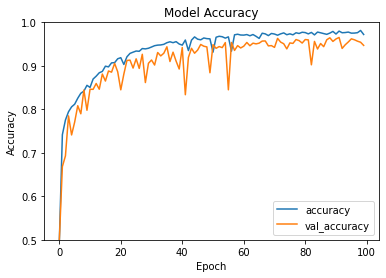

In [32]:
import matplotlib.pyplot as plt
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


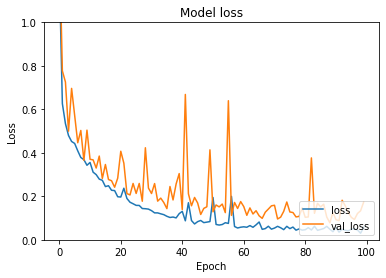

In [33]:
plt.title('Model loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

**Cofusion Matrix Added**


defects = {'nd':0.0, 'bf':1.0, 'ur':2.0, 'brf':3.0, 'rm':4.0, 'brbf':5.0, 'vusff':6.0, 'puspf':7.0, 'mpuspf':8.0, 'mswf':9.0, 'swf':10.0}

In [34]:
Class_names = [
'ND',
'BF',
'UR',
'BRF',
'RM',
'BRBF',
'VUSFF',
'PUSPF',
'MPUSPF',
'MSWF',
'SWF']

Class_names.remove('PUSPF')
Class_names.remove('MPUSPF')

In [35]:
predictions = model.predict(test_dataset, batch_size=10, verbose=0)

In [36]:
predictions

array([[-299.38516  , -113.569336 ,   41.09549  , ...,  -61.53975  ,
         -65.6252   ,  -57.300518 ],
       [  39.471195 ,   -8.311532 ,  -47.342182 , ...,   17.99365  ,
          10.727131 ,  -42.49673  ],
       [-111.06825  ,   -2.6708353,   -7.405575 , ...,  -12.146557 ,
         -37.076687 ,  -72.3107   ],
       ...,
       [ -53.98263  ,   58.39095  ,    4.9989676, ...,    1.9074494,
         -32.378006 ,  -77.25136  ],
       [ -11.907473 ,   -6.579865 ,  -10.901267 , ...,  -10.27234  ,
           7.84781  ,   -4.711889 ],
       [-191.90332  ,  -40.747086 ,   19.587255 , ...,  -32.965324 ,
         -31.604053 ,  -33.237965 ]], dtype=float32)

In [37]:
predicted_classes = model.predict_classes(test_dataset, batch_size=10, verbose=0)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [38]:
np.unique(predicted_classes)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [39]:
confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=predicted_classes)

In [40]:
confusion_matrix

array([[414,   1,   1,   0,   0,   0,   1,   1,   0],
       [  1, 422,   1,   3,   0,   0,   0,   0,   0],
       [  0,   6, 393,   4,   0,  16,   0,   0,   0],
       [  0,   0,   2, 419,   0,  14,   6,   0,   0],
       [  0,   0,   0,   4, 345,   1,   0,   0,   0],
       [  0,   3,   4,   8,   0, 406,   7,   0,   0],
       [  4,   3,   0,   2,   0,   1, 386,   2,   0],
       [  3,   1,   0,   2,   0,   0,   4, 385,  17],
       [  1,   1,   1,   0,   0,   0,   0,  71, 353]])

In [41]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()



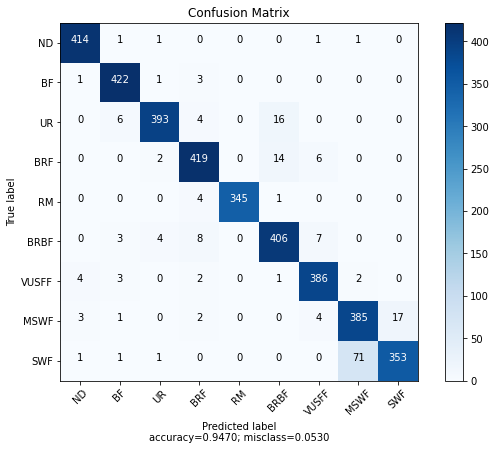

In [42]:
plot_confusion_matrix(confusion_matrix, 
                      normalize    = False,
                      target_names = Class_names,
                      title        = "Confusion Matrix")



In [43]:
report = metrics.classification_report(y_test, predicted_classes)
print(report)  

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       418
         1.0       0.97      0.99      0.98       427
         2.0       0.98      0.94      0.96       419
         3.0       0.95      0.95      0.95       441
         4.0       1.00      0.99      0.99       350
         5.0       0.93      0.95      0.94       428
         6.0       0.96      0.97      0.96       398
         7.0       0.84      0.93      0.88       412
         8.0       0.95      0.83      0.89       427

    accuracy                           0.95      3720
   macro avg       0.95      0.95      0.95      3720
weighted avg       0.95      0.95      0.95      3720



In [44]:
# save model and architecture to single file
model.save("Model_CNN_1_9_Classes.h5")
print("Saved model to disk")

Saved model to disk
